In [595]:
import os
import collections


import powerlaw
import networkx as nx

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import kaleido as ka
import datetime as dt
import warnings
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
import kaleido
from datetime import date
from tqdm import tqdm
sns.set()
warnings.filterwarnings("ignore")

# Powerlaw test for network

In [596]:
file_path = "Fig/"  # Change this to your desired file path and format (e.g., .png, .jpg, .svg)

# Save the figure to the specified file path
network_name = "iconomi"
window_size = 7
threshold = pd.to_datetime('2018-03-01').date()
selectedNetwork = pd.read_csv("dataset/network"+network_name+".txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')

In [597]:
selectedNetwork

,from,to,date,value
0,4377026,1747827,2017-11-20 22:17:18,1516401039255000000000
1,193337,2008557,2017-09-09 10:54:52,4128627960000000000000
2,4388689,1747716,2017-06-29 12:21:16,2392127188967118000000
3,4375736,1747716,2017-05-30 09:01:09,1596956542880647200000
4,4383181,1747716,2017-04-09 21:09:14,1999900000000000100000
...,...,...,...,...
114909,2084371,4379248,2017-08-24 21:39:26,13316606820000000000
114910,418904,373666,2017-12-18 06:33:37,15623000000000000000
114911,193337,298110,2017-06-20 09:24:44,792000000000000000000
114912,193337,4169343,2017-05-26 12:15:53,1679800000000000000000


**Create the graph from transaction network**

In [598]:
aWindowGraph = nx.DiGraph()
# Populate graph with edges
for item in selectedNetwork.to_dict(orient="records"):
    aWindowGraph.add_edge(item["from"], item["to"], value=item["value"])
fit = powerlaw.Fit(list(dict(aWindowGraph.degree()).values()), estimate_discrete=False)

Calculating best minimal value for power law fit


In [599]:
#read blockchain events from chartalist
url = "dataset/gt.txt"

# Read the file into a DataFrame
df_events = pd.read_csv(url, delimiter='\t')
df_events['date'] = pd.to_datetime(df_events['date'], format='%d-%m-%Y')

**Plotting CDF,PDF,CCDF**

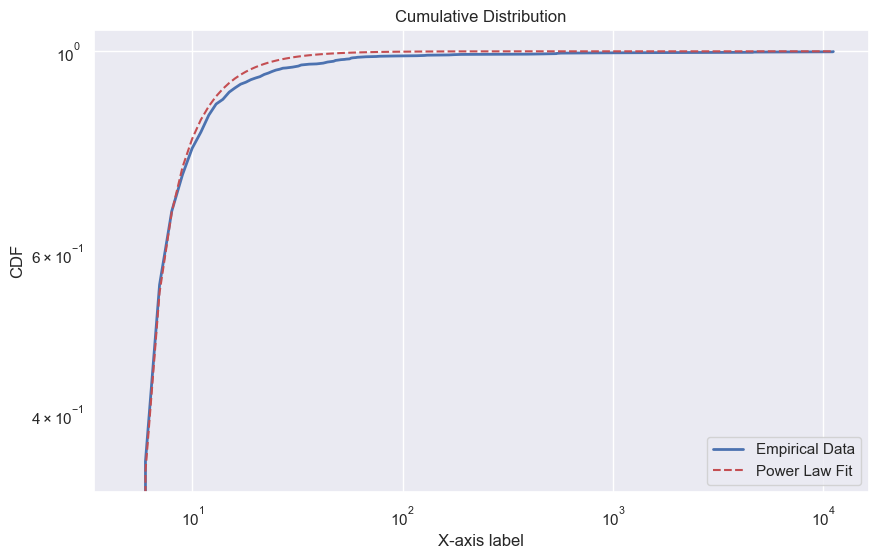

In [600]:
plt.figure(figsize=(10, 6))
fit.plot_cdf(color='b', linewidth=2,label='Empirical Data')
fit.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('X-axis label')
plt.ylabel('CDF')
plt.title('Cumulative Distribution')
plt.legend()
plt.show()

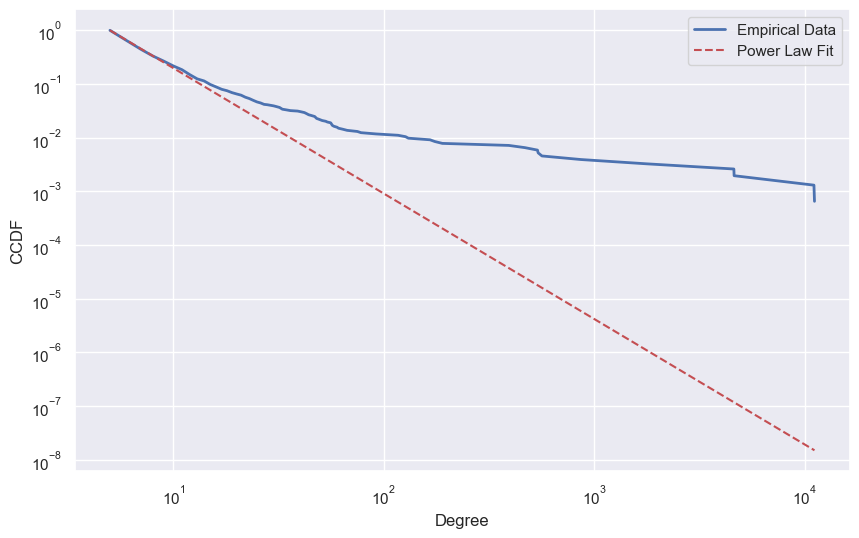

In [601]:
# Probability plot
plt.figure(figsize=(10, 6))
fit.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


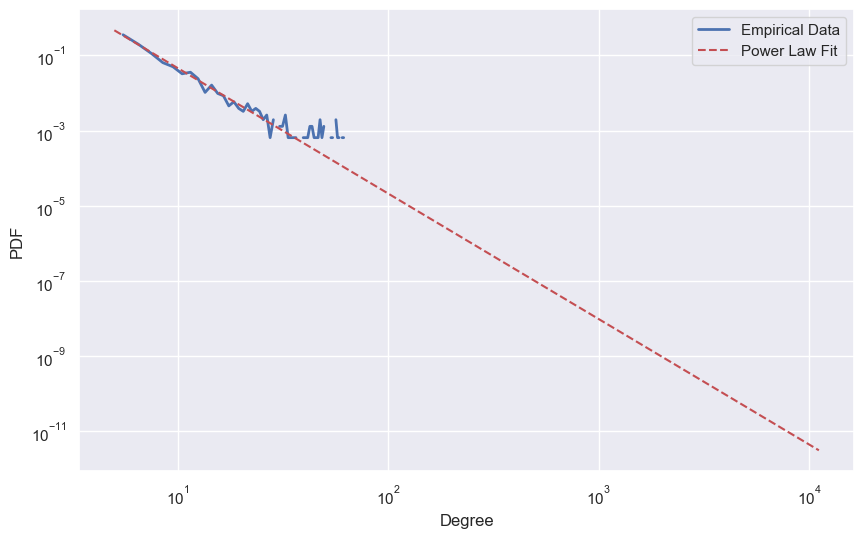

In [602]:
# PDF plot
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Power statistics**

In [603]:
fit.power_law.alpha

3.3369908016613934

In [604]:
fit.power_law.xmin

5.0

In [605]:
fit.distribution_compare('power_law', 'exponential')

(3292.124851894239, 6.6648326226546605e-09)

# Powerlaw test on graph generating by BA model

In [606]:
BA_graph = nx.barabasi_albert_graph(20000,10)
BA_degrees = pd.DataFrame(BA_graph.degree(),columns=['Node','Degree'])
BA_degrees

,Node,Degree
0,0,710
1,1,266
2,2,311
3,3,332
4,4,178
...,...,...
19995,19995,10
19996,19996,10
19997,19997,10
19998,19998,10


In [607]:
fit_BA = powerlaw.Fit(BA_degrees['Degree'])

Calculating best minimal value for power law fit


**Plotting CDF,PDF,CCDF**

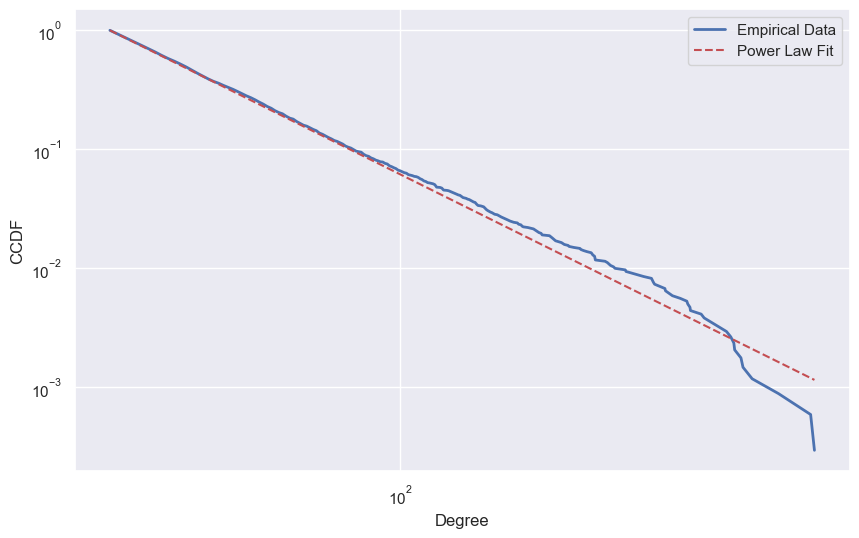

In [608]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


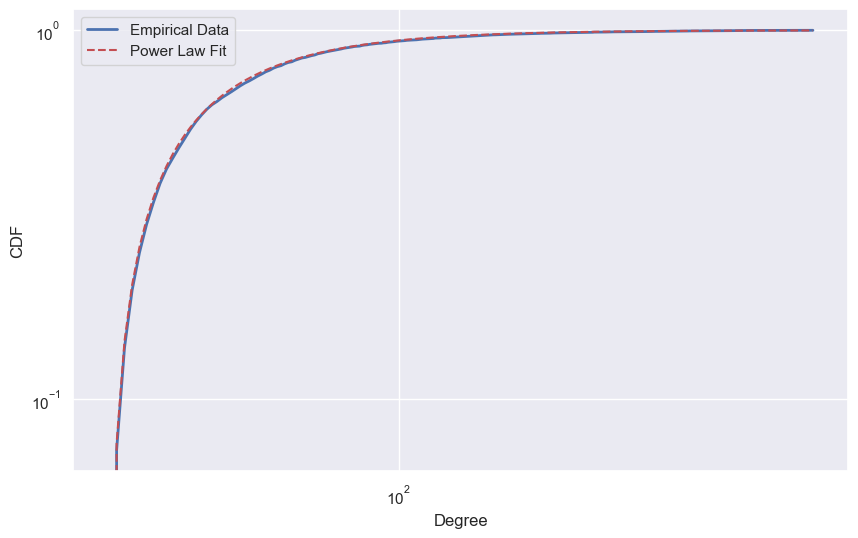

In [609]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_cdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.legend()
plt.show()

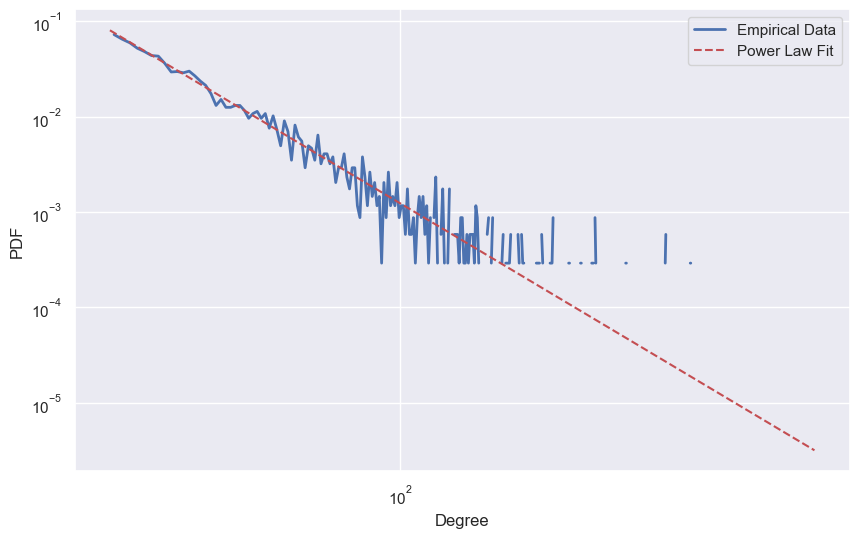

In [610]:
plt.figure(figsize=(10, 6))
fit_BA.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit_BA.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Powerlaw statistics**

In [611]:
fit_BA.power_law.alpha

3.0137658762238737

In [612]:
fit_BA.power_law.xmin

25.0

In [613]:
fit_BA.distribution_compare('power_law', 'exponential')[0]

633.5085253379075

# Daily transaction network
Each data points in the phase base represent transaction networks for each day

In [614]:
selectedNetwork = pd.read_csv("dataset/network"+network_name+".txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
68220,4397683,4386416,2016-10-24,100000000000000000000000000
60587,67435,4392573,2016-10-24,1000000000000000000
25659,4396631,4396632,2016-10-24,1000000000000000000
50577,2853521,2219829,2016-10-24,5000000000000000000
56531,2853521,2219829,2016-10-24,5000000000000000000
...,...,...,...,...
11940,5,4370145,2018-05-06,5234800000000000000000
95201,6,4370149,2018-05-06,5996800000000000000000
31315,5,6,2018-05-06,98972000000000000000000
17770,78833,78834,2018-05-06,47000000000000000000


**Construct graph for each day and apply powerlaw test on each transaction graph and store it in CSV file**

In [615]:
currDate = selectedNetwork['date'].min()
aWindowGraph = nx.DiGraph()
score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []
for index, row in selectedNetwork.iterrows():
    if(row['date'] != currDate ):
        row_df = []
        
        degrees = list(dict(aWindowGraph.degree()).values())
        fit = powerlaw.Fit(degrees)
        row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
        row_df.append(aWindowGraph.number_of_nodes())
        row_df.append(fit.power_law.xmin)
        row_df.append(fit.power_law.alpha)
        row_df.append(currDate)
        
        currDate = row['date']
        
        row_list.append(row_df)
        aWindowGraph = nx.DiGraph()
    else:
        aWindowGraph.add_edge(row["from"], row["to"], value=row["value"])
df_power_law = pd.DataFrame(row_list,columns= column)    
df_power_law

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

,score,#nodes,xmin,alpha,date
0,0.000000,12,NaN,NaN,2016-10-24
1,53.470739,621,2.0,4.029977,2016-10-25
2,44.165813,372,2.0,3.346482,2016-10-26
3,35.753581,300,2.0,2.966623,2016-10-27
4,587.022127,321,1.0,10.310246,2016-10-28
...,...,...,...,...,...
554,6.307220,55,2.0,3.939834,2018-05-01
555,17.854324,62,2.0,4.750432,2018-05-02
556,35.056423,97,2.0,5.638306,2018-05-03
557,49.909714,71,1.0,4.210037,2018-05-04


In [616]:
df_power_law.to_csv("result_dataset\power_law_result_"+network_name+".csv")

# Split data at stable period March 2018 of the network

In [617]:
df_power_law = pd.read_csv("result_dataset\power_law_result_"+network_name+".csv")
df_power_law['date'] = pd.to_datetime(df_power_law['date'])
df_power_law['date'] = df_power_law['date'].dt.date

print(threshold)
event_days_data = df_power_law[df_power_law['date'] <= threshold]
testNetwork = df_power_law[df_power_law['date'] > threshold]

2018-03-01


In [618]:
testNetwork

,Unnamed: 0,score,#nodes,xmin,alpha,date
494,494,62.196062,144,2.0,6.830520,2018-03-02
495,495,56.404320,182,2.0,5.048374,2018-03-03
496,496,50.050065,66,1.0,4.381617,2018-03-04
497,497,18.002973,94,2.0,3.461796,2018-03-05
498,498,31.289540,109,2.0,4.237240,2018-03-06
...,...,...,...,...,...,...
554,554,6.307220,55,2.0,3.939834,2018-05-01
555,555,17.854324,62,2.0,4.750432,2018-05-02
556,556,35.056423,97,2.0,5.638306,2018-05-03
557,557,49.909714,71,1.0,4.210037,2018-05-04


**Draw diagram to illustrate the score resulted from the comparision between powerlaw and exponential distribution for each day**

In [619]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_power_law['date'], y=df_power_law['score'], mode='lines', name='Line'))
# fig.add_trace(go.Scatter(x=df_power_law['#nodes'], y=df_power_law['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='Date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"score"+network_name+"_"+str(window_size)+".png",engine="kaleido")


**Draw diagram to illustrate the trajectory with data points in steady period in green**

In [620]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=event_days_data['#nodes'], y=event_days_data['alpha'], mode='lines', name='Line', line=dict(width=1, color='black')))
fig.add_trace(go.Scatter(x=event_days_data['#nodes'], y=event_days_data['alpha'], mode='markers', name='Scatter', line=dict(color='black')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='lines', name='Line',line=dict(width=1,color='red')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='markers', name='Scatter',line=dict(color='red')))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name+'\'s Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"alpha"+network_name+"_"+str(window_size)+".png")


# Sliding window
Each data points in the phase base represent transaction networks for windows of 7 days

In [621]:

selectedNetwork = pd.read_csv("dataset/network"+network_name+".txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
68220,4397683,4386416,2016-10-24,100000000000000000000000000
60587,67435,4392573,2016-10-24,1000000000000000000
25659,4396631,4396632,2016-10-24,1000000000000000000
50577,2853521,2219829,2016-10-24,5000000000000000000
56531,2853521,2219829,2016-10-24,5000000000000000000
...,...,...,...,...
11940,5,4370145,2018-05-06,5234800000000000000000
95201,6,4370149,2018-05-06,5996800000000000000000
31315,5,6,2018-05-06,98972000000000000000000
17770,78833,78834,2018-05-06,47000000000000000000


**Apply sliding window algorithm and apply powerlaw test on each window and store to dataframe**

In [622]:
def sliding_window_dates(start_date, end_date, window_size=7):
    # Initialize the sliding window
    
    window_end = start_date   # Initial window size is 6 days
    
    
    # Slide the window through the date interval
    while window_end <= end_date:
        window_start = window_end - timedelta(days=(window_size-1))
        if(window_start >= start_date):
            yield (window_start, window_end)
        
        
        # Slide the window by one day
       
        window_end += timedelta(days=1)


start_date = selectedNetwork['date'].min()
end_date = selectedNetwork['date'].max()

score_list = []
column = ["score","#nodes","xmin","alpha","window_start","window_end"]
row_list = []

for window_start, window_end in sliding_window_dates(start_date, end_date,window_size):
    selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= window_start) & (selectedNetwork['date'] <= window_end)]
    aWindowGraph = nx.DiGraph()
    
    for index, row in selectedNetworkInTimeFrame.iterrows():
        aWindowGraph.add_edge(row["from"], row["to"], value=row["value"])
    row_df = []
        
    degrees = list(dict(aWindowGraph.degree()).values())
    fit = powerlaw.Fit(degrees)
    row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
    row_df.append(aWindowGraph.number_of_nodes())
    row_df.append(fit.power_law.xmin)
    row_df.append(fit.power_law.alpha)
    row_df.append(window_start)
    row_df.append(window_end)
    row_list.append(row_df)

df_sliding = pd.DataFrame(row_list,columns= column)  

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [623]:
df_sliding

,score,#nodes,xmin,alpha,window_start,window_end
0,364.045036,1540,2.0,3.962959,2016-10-24,2016-10-30
1,371.960449,1557,2.0,3.989463,2016-10-25,2016-10-31
2,239.252927,1133,2.0,3.602641,2016-10-26,2016-11-01
3,173.416647,892,2.0,3.410421,2016-10-27,2016-11-02
4,140.184271,731,2.0,3.456353,2016-10-28,2016-11-03
...,...,...,...,...,...,...
549,228.900698,479,2.0,6.429465,2018-04-26,2018-05-02
550,253.784249,482,2.0,7.268223,2018-04-27,2018-05-03
551,241.210650,471,2.0,7.290564,2018-04-28,2018-05-04
552,206.988655,451,2.0,6.676150,2018-04-29,2018-05-05


In [624]:
df_sliding.to_csv("result_dataset\power_law_result_"+network_name+"_"+str(window_size)+".csv")

In [625]:
df_sliding = pd.read_csv("result_dataset\power_law_result_"+network_name+"_"+str(window_size)+".csv",index_col=False)
df_sliding

,Unnamed: 0,score,#nodes,xmin,alpha,window_start,window_end
0,0,364.045036,1540,2.0,3.962959,2016-10-24,2016-10-30
1,1,371.960449,1557,2.0,3.989463,2016-10-25,2016-10-31
2,2,239.252927,1133,2.0,3.602641,2016-10-26,2016-11-01
3,3,173.416647,892,2.0,3.410421,2016-10-27,2016-11-02
4,4,140.184271,731,2.0,3.456353,2016-10-28,2016-11-03
...,...,...,...,...,...,...,...
549,549,228.900698,479,2.0,6.429465,2018-04-26,2018-05-02
550,550,253.784249,482,2.0,7.268223,2018-04-27,2018-05-03
551,551,241.210650,471,2.0,7.290564,2018-04-28,2018-05-04
552,552,206.988655,451,2.0,6.676150,2018-04-29,2018-05-05


In [626]:
event_days_data

,Unnamed: 0,score,#nodes,xmin,alpha,date
0,0,0.000000,12,NaN,NaN,2016-10-24
1,1,53.470739,621,2.0,4.029977,2016-10-25
2,2,44.165813,372,2.0,3.346482,2016-10-26
3,3,35.753581,300,2.0,2.966623,2016-10-27
4,4,587.022127,321,1.0,10.310246,2016-10-28
...,...,...,...,...,...,...
489,489,27.461750,43,1.0,5.780346,2018-02-25
490,490,5.075484,62,2.0,3.500705,2018-02-26
491,491,8.216336,67,2.0,4.760356,2018-02-27
492,492,36.879198,56,1.0,5.766065,2018-02-28


In [627]:
 
# Assuming you have already read both DataFrames (df_sliding and df_events)

# Convert 'window_start' and 'window_end' in df_sliding to datetime
df_sliding['window_start'] = pd.to_datetime(df_sliding['window_start'], format='%Y-%m-%d')
df_sliding['window_end'] = pd.to_datetime(df_sliding['window_end'], format='%Y-%m-%d')

# Convert 'date' in df_events to datetime
df_events['date'] = pd.to_datetime(df_events['date'], format='%Y-%m-%d')

# Filter df_sliding based on 'window_start' dates in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]


In [628]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='lines', name='Line',line=dict(width=1,color="black")))
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='markers', name='Scatter',line=dict(color="black")))

# Scatter plot with red lines and markers for the dates in df_sliding that also appear in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter(
    x=event_days_data['#nodes'],
    y=event_days_data['alpha'],
    mode='markers',
    name='Event Days',
    line=dict(width=1, color='red')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name+'\'s Trajectory (Sliding windows of '+str(window_size)+' days)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [629]:
fig = go.Figure()
 

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['window_start'], y=df_sliding['score'], mode='lines', name='Line'))



# Customize the layout
fig.update_layout(
    title=dict(
        text='Comparision score to exponential distribution',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=800
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"comparison"+network_name+"_"+str(window_size)+".png",engine='kaleido')


In [630]:
start_date = selectedNetwork['date'].min()
end_date = selectedNetwork['date'].max()

score_list = []
column = ["#nodes","e1","e2","e3","window_start","window_end"]
row_list = []

dates = sliding_window_dates(start_date, end_date,window_size)


for window_start, window_end in dates:
    print(window_start,window_end)
    selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= window_start) & (selectedNetwork['date'] <= window_end)]
    aWindowGraph = nx.DiGraph()

    for index, row in selectedNetworkInTimeFrame.iterrows():
        aWindowGraph.add_edge(row["from"], row["to"], value=row["value"])
    row_df = []

    adjacency_matrix = nx.to_numpy_array(aWindowGraph)

    # Calculate the eigenvalues
    eigenvalues = np.linalg.eigvals(adjacency_matrix)

    # Sort the eigenvalues in descending order
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]

    # Extract the largest two eigenvalues
    largest_eigenvalues = sorted_eigenvalues[:3]

    row_df.append(aWindowGraph.number_of_nodes())
    row_df.append(largest_eigenvalues[0])
    row_df.append(largest_eigenvalues[1])
    row_df.append(largest_eigenvalues[2])
    row_df.append(window_start)
    row_df.append(window_end)
    row_list.append(row_df)

df_sliding = pd.DataFrame(row_list,columns= column)  

2016-10-24 2016-10-30
2016-10-25 2016-10-31
2016-10-26 2016-11-01
2016-10-27 2016-11-02
2016-10-28 2016-11-03
2016-10-29 2016-11-04
2016-10-30 2016-11-05
2016-10-31 2016-11-06
2016-11-01 2016-11-07
2016-11-02 2016-11-08
2016-11-03 2016-11-09
2016-11-04 2016-11-10
2016-11-05 2016-11-11
2016-11-06 2016-11-12
2016-11-07 2016-11-13
2016-11-08 2016-11-14
2016-11-09 2016-11-15
2016-11-10 2016-11-16
2016-11-11 2016-11-17
2016-11-12 2016-11-18
2016-11-13 2016-11-19
2016-11-14 2016-11-20
2016-11-15 2016-11-21
2016-11-16 2016-11-22
2016-11-17 2016-11-23
2016-11-18 2016-11-24
2016-11-19 2016-11-25
2016-11-20 2016-11-26
2016-11-21 2016-11-27
2016-11-22 2016-11-28
2016-11-23 2016-11-29
2016-11-24 2016-11-30
2016-11-25 2016-12-01
2016-11-26 2016-12-02
2016-11-27 2016-12-03
2016-11-28 2016-12-04
2016-11-29 2016-12-05
2016-11-30 2016-12-06
2016-12-01 2016-12-07
2016-12-02 2016-12-08
2016-12-03 2016-12-09
2016-12-04 2016-12-10
2016-12-05 2016-12-11
2016-12-06 2016-12-12
2016-12-07 2016-12-13
2016-12-08

In [631]:

df_sliding['window_start'] = pd.to_datetime(df_sliding['window_start'], format='%d-%m-%Y')
df_sliding['window_end'] = pd.to_datetime(df_sliding['window_end'], format='%d-%m-%Y')
# Convert 'date' in df_events to datetime
df_events['date'] = pd.to_datetime(df_events['date'], format='%d-%m-%Y')

In [632]:


fig = go.Figure()
# take the real values of the eigens, ignore the complex values.
df_sliding['e1'] = df_sliding['e1'].apply(lambda x: x.real)
df_sliding['e2'] = df_sliding['e2'].apply(lambda x: x.real)
df_sliding['e3'] = df_sliding['e3'].apply(lambda x: x.real)

# Scatter plot with black lines and markers for the entire dataset
fig.add_trace(go.Scatter(
    x=df_sliding['#nodes'],
    y=df_sliding['e1'],
    mode='lines+markers',
    name='Entire Dataset',
    line=dict(width=1, color='black')
))

# Scatter plot with red lines and markers for the dates in df_sliding that also appear in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter(
    x=event_days_data['#nodes'],
    y=event_days_data['e1'],
    mode='markers',
    name='Event Days',
    line=dict(width=1, color='red')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name+'\'s Trajectory (Sliding windows of '+str(window_size)+' days)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='eigen value'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black',type="log")
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"eigens"+network_name+"_"+str(window_size)+".png")


In [633]:


fig = go.Figure()
# take the real values of the eigens, ignore the complex values.
df_sliding['e1'] = df_sliding['e1'].apply(lambda x: x.real)
df_sliding['e2'] = df_sliding['e2'].apply(lambda x: x.real)
df_sliding['e3'] = df_sliding['e3'].apply(lambda x: x.real)

# Scatter plot with black lines and markers for the entire dataset
fig.add_trace(go.Scatter(
    x=df_sliding['#nodes'],
    y=df_sliding['e1']-df_sliding['e2'],
    mode='lines+markers',
    name='Entire Dataset',
    line=dict(width=1, color='black')
))

# Scatter plot with red lines and markers for the dates in df_sliding that also appear in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter(
    x=event_days_data['#nodes'],
    y=event_days_data['e1']-event_days_data['e2'],
    mode='markers',
    name='Event Days',
    line=dict(width=1, color='red')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name+'\'s Trajectory (Sliding windows of '+str(window_size)+' days)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='e1-e2'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black',type="log")
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"eigensdiff"+network_name+"_"+str(window_size)+".png")


In [634]:


fig = go.Figure()
# take the real values of the eigens, ignore the complex values.
df_sliding['e1'] = df_sliding['e1'].apply(lambda x: x.real)
df_sliding['e2'] = df_sliding['e2'].apply(lambda x: x.real)
df_sliding['e3'] = df_sliding['e3'].apply(lambda x: x.real)

# Scatter plot with black lines and markers for the entire dataset
fig.add_trace(go.Scatter(
    x=df_sliding['#nodes'],
    y=df_sliding['e1']/(10+df_sliding['e2']),
    mode='lines+markers',
    name='Entire Dataset',
    line=dict(width=1, color='black')
))

# Scatter plot with red lines and markers for the dates in df_sliding that also appear in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter(
    x=event_days_data['#nodes'],
    y=event_days_data['e1']/(10+event_days_data['e2']),
    mode='markers',
    name='Event Days',
    line=dict(width=1, color='red')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name+'\'s Trajectory (Sliding windows of '+str(window_size)+' days)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='e1/(10+e2)'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black',type="log")
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()
#fig.write_image(file_path+"eigensratio"+network_name+"_"+str(window_size)+".png")


In [635]:
fig = go.Figure() 
# Scatter plot with black lines and markers for the entire dataset
fig.add_trace(go.Scatter(
    x=df_sliding['#nodes'],
    y=(df_sliding['e1'] - df_sliding['e2'])/df_sliding['e1'],
    mode='lines+markers',
    name='Entire Dataset',
    line=dict(width=1, color='black')
))

# Scatter plot with red lines and markers for the dates in df_sliding that also appear in df_events
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter(
    x=event_days_data['#nodes'],
    y=(event_days_data['e1'] - event_days_data['e2'])/event_days_data['e1'],
    mode='markers',
    name='Event Days',
    line=dict(width=1, color='red')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text=network_name + '\'s Trajectory (Sliding windows of ' + str(window_size) + ' days)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='(e1-e2)/e1'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',  # Set the plot area background color to white
    width=1000
)

# Update the marker properties for the "Event Days" trace to be red
fig.update_traces(marker=dict(color='red'), selector=dict(name='Event Days'))

fig.update_xaxes(linecolor='black', type="log")
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()


In [636]:
import plotly.graph_objects as go

# Assuming you have already read and processed your data and applied the necessary conversions to real values

# Create a 3D scatter plot
fig = go.Figure()

# Add a 3D scatter trace for the entire dataset
fig.add_trace(go.Scatter3d(
    x=df_sliding['e1'],
    y=df_sliding['e2'],
    z=df_sliding['e3'],
    mode='markers',
    name='Entire Dataset',
    marker=dict(size=4, color='black')
))

# Filter the data for trainNetwork and add a separate trace for it
event_days_data = df_sliding[df_sliding['window_start'].isin(df_events['date'])]
fig.add_trace(go.Scatter3d(
    x=event_days_data['e1'],
    y=event_days_data['e2'],
    z=event_days_data['e3'],
    mode='markers',
    name='Train Network',
    marker=dict(size=4, color='red')
))

# Customize the layout
fig.update_layout(
    title='Aragon\'s Trajectory (Sliding windows of '+str(window_size)+'days)',
    scene=dict(
        xaxis_title='Eigenvalue 1',
        yaxis_title='Eigenvalue 2',
        zaxis_title='Eigenvalue 3'
    ),
    width=1000
)

# Show the 3D plot
fig.show()
fig.write_html(file_path+"3d"+network_name+"_"+str(window_size)+".html")
